## Linear Regression 

In [1]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# THIS ALLOWS PLOTS TO APPEAR DIRECTLY IN THE NOTEBOOK
%matplotlib inline

## Example: Advertising Data 

In [3]:
#READ DATA INTO A DATAFRAME
shri=pd.read_csv(r"C:\Users\Girish BS\Desktop\SHRI CODE FILES\Machine learning\Project1\advertising.csv")

In [4]:
shri.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#PRINT THE SHAPE OF THE DATAFRAME
shri.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

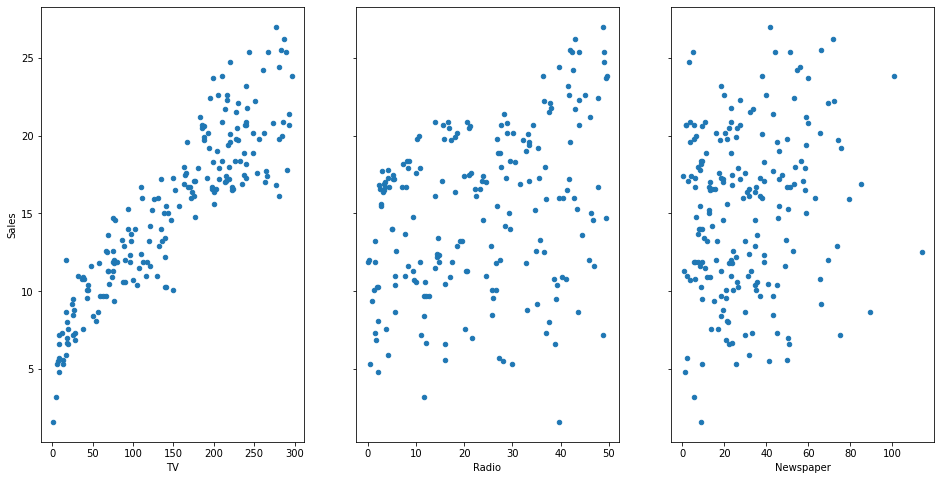

In [6]:
# VISUALIZE THE RELATIONSHIP BETWEEN THE FEATURES AND THE RESPONSE USING SCATTERPLOTS
fig,axs=plt.subplots(1,3,sharey=True)
shri.plot(kind="scatter",x="TV",y="Sales",ax=axs[0],figsize=(16,8))
shri.plot(kind="scatter",x="Radio",y="Sales",ax=axs[1])
shri.plot(kind="scatter",x="Newspaper",y="Sales",ax=axs[2])

## Scikit-learn 

In [7]:
#CREATE K AND l
features_cols=["TV"]
K=shri[features_cols]
l=shri.Sales

In [8]:
#FOLLOW THE USUAL SKLEARN :import,instantiate,fit
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(K,l)

LinearRegression()

In [9]:
#PRINT INTERCEPT AND COEFFICIENTS
print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


## Using the model for prediction 

In [10]:
#MANUALLY CALCULATE THE PREDICTION
6.97482+0.055467*50

9.74817

In [11]:
#YOU HAVE TO CREATE A DATAFRAME SINCE THE STATSMODELS FORMULA INTERFACE EXPECTS IT.
K_new=pd.DataFrame({'TV':[50]})
K_new.head()

,TV
0,50


In [12]:
#USE THE MODEL TO MAKE PREDICTION ON A NEW VALUE
lm.predict(K_new)

array([9.74806001])

## Plotting the Least Squares line 

In [13]:
#CREATE A DATAFRAME WITH THE MINIMUM AND MAXIMUM VALUES OF TV
K_new=pd.DataFrame({'TV':[shri.TV.min(),shri.TV.max()]})
K_new.head()

,TV
0,0.7
1,296.4


In [14]:
#MAKE PREDICTION FOR THOSE K VALUES AND STORE THEM
rakshi=lm.predict(K_new)
rakshi

array([ 7.01364683, 23.41457946])

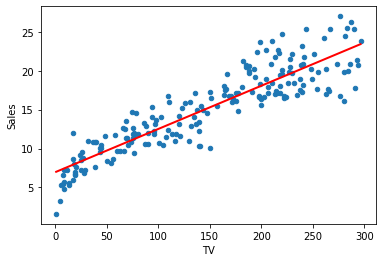

In [15]:
#FIRST,PLOT THE OBSERVED DATA
shri.plot(kind='scatter',x='TV',y='Sales')
#THEN,PLOT THE LEAST SQUARES LINE
plt.plot(K_new,rakshi,c='red',linewidth=2)

## Confidence in our model 

In [16]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales~TV',data=shri).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


## Hypothesis Testing and p-values 

In [17]:
# PRINT THE P-VALUES FOR THE MODEL COEFFICIENTS
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

## How well does the model fit the data? 

In [18]:
#PRINT THE R-SQUARED VALUES FOR THE MODEL
lm.rsquared

0.8121757029987414

## Multiple Linear Regression 

In [19]:
#CREATE S AND h
feature_cols=['TV','Radio','Newspaper']
S=shri[feature_cols]
h=shri.Sales

In [20]:
lm=LinearRegression()
lm.fit(S,h)

LinearRegression()

In [21]:
# PRINT INTERCEPT AND COEFFICIENTS
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [22]:
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=shri).fit()

In [23]:
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           8.13e-99
Time:                        22:16:27   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Selection 

In [24]:
#ONLY INCLUDE TV AND RADIO IN THE MODEL
lm=smf.ols(formula='Sales~TV+Radio',data=shri).fit()
lm.rsquared

0.9025896186081139

In [25]:
#ADD NEWSPAPER TO THE MODEL(WHICH BELEIEVE HAS NO ASSOCIATION WITH SALES)
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=shri).fit()
lm.rsquared

0.9025912899684558